<a href="https://colab.research.google.com/github/harshadaborkar/hello/blob/master/25_08_M_L_LINEAR_REGRESSION_BOSTON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Boston Housing Dataset
# The Boston Housing Dataset consists of price of houses in various places in Boston. 
# Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS)
# the age of people who own the house (AGE) and many other attributes.
# We can import the data right away from the scikit-learn itself. 
# In this story, we will use several python libraries as required here.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
boston.data.shape

(506, 13)

In [ ]:
#As we can see it return (506, 13), that means there are 506 rows of data with 13 columns.

In [ ]:
# If we want to know what are the 13 columns. We can simply run this snippet of code and it will return the feature names.

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Now let’s convert it into pandas

bost = pd.DataFrame(boston.data)
bost.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Let’s convert the index to the column names.

bost.columns = boston.feature_names
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#  Here there is no column called ‘PRICE’ in the data frame. It is because the target column it’s available in other attribute
# called target. So let’s check the shape of the boston.target.

In [ ]:
boston.target.shape

(506,)

In [ ]:
# it turns out that it match the number of rows in the dataset. Let’s add it to the DataFrame.

bost['PRICE'] = boston.target
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#  Summary statistics of the dataset

bost.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Split train-test dataset :
# We will split the dataset into train and test dataset.
# Before splitting the data to train-test dataset, we would need to split the dataset into two: 
# target value and predictor values. Let’s call the target value Y and predictor values X.
#Thus,
# Y = Boston Housing Price
# X = All other features


In [ ]:
bost.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
X = bost[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = bost['PRICE']

# Now, we can finally split the dataset into train and test with the snippet below.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Now we got ourselves our train and test datasets with the proportion of 60% for train data and 40% for test data.

# We can also check the shape of each variable

X_train.shape

(303, 13)

In [ ]:
X_test.shape

(203, 13)

In [ ]:
y_train.shape

(303,)

In [ ]:
y_test.shape

(203,)

In [ ]:
# Linear Regression:

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

predictions

array([38.76995104, 27.39271318, 16.26805601, 16.64592872, 30.5945708 ,
       31.37975753, 37.68282481,  7.57986744, 33.62371472,  6.94206736,
       30.00015138, 13.74184077, 16.41357803, 17.5975484 , 24.92452314,
       20.61277162,  6.84027833, 32.74459645, 28.14176473, 24.87051184,
       12.01460369, 19.89597528, 22.93223855, 24.84808083, 33.41944923,
       18.2663553 , 32.40616206, 19.07263109, 27.85446156, 33.36724349,
       20.31071184, 18.71427039, 36.3942392 , 43.97914411, 28.53636198,
       22.23810379, 15.23341286, 18.4441601 ,  2.99896469, 30.75373687,
       23.98495287, 17.65233987, 33.49269972, 13.72450288, 17.45026475,
       25.3864821 , 29.9370352 , 16.43822597, 27.0157306 , 23.23886475,
       31.8958797 , 36.8917952 , 22.96758436, 18.06656811, 30.34602124,
       -0.30828515, 19.8446382 , 16.6131071 , 23.63902347, 21.26225918,
       29.69766593,  3.14282554, 16.86387632, 19.76329036,  9.71050797,
       24.21870511, 24.27695942, 19.87071765, 17.16247142, 19.85

In [ ]:
y_test

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
78     21.2
160    27.0
124    18.8
167    23.8
272    24.4
Name: PRICE, Length: 203, dtype: float64

In [ ]:
# It will fit a model based on X_train and Y_train. Now we already got the linear model, we try to 
#predict it to the X_test and now we got the prediction values which stored into predictions. 
#To visualize the differences between actual prices and predicted values we also create a scatter plot.

Text(0.5, 1.0, 'Scatter Plot of Prices vs Predicted Prices')

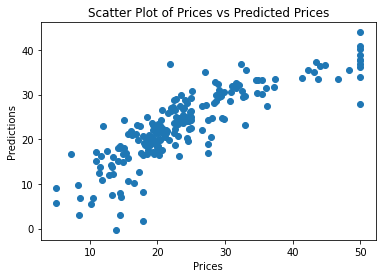

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Prices')
plt.ylabel('Predictions')
plt.title('Scatter Plot of Prices vs Predicted Prices')

In [ ]:
# Ideally, the scatter plot should create a linear line. Since the model does not fit 100%, the scatter plot 
# is not creating a linear line.

In [ ]:
# Regression Evaluation Metrics:
# There are three common evaluation metrcs for regression problems:Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
# RMSE is the most popular because it is interpretable in y units (which cant possible in MSE)
# All of these values are errors and we want to minimize these values (errors) in order to create the best model

# Root Mean Squared Error

#(Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively
#  predict the data accurately. for accurate prediction it should be close 0)

from sklearn import metrics
metrics.mean_squared_error(y_test,predictions)

29.41636546745284

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
RMSE

5.423685598138303

In [ ]:
#That means that the model isn’t a really great linear model. But, as a start, it is a good way to go.